## Ejercicio 1
Escriba una función que devuelva el valor de membresı́a μA (x) para
un conjunto A. Debe tomar como parámetros un vector que define el
conjunto, el tipo de conjunto que se quiere utilizar, y el valor de x para
el cual se quiere conocer su membresı́a.


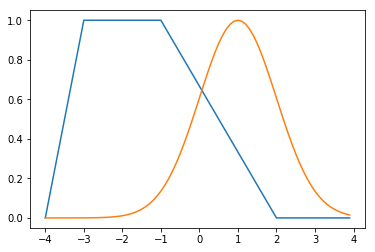

In [10]:
import numpy as np
from matplotlib import pyplot as plt

def membresia(x, vConj, tipo):
    u = 0.0
    if tipo == 1: #trapezoidal
        if x < vConj[0]  or vConj[3] < x:
            u = 0
        elif vConj[0] <= x and x < vConj[1] :
            u = (x - vConj[0]) / (vConj[1] - vConj[0])
        elif vConj[1] <= x and x <= vConj[2] :
            u = 1
        elif vConj[2] < x and x <= vConj[3]:
            u = 1 - (x - vConj[2]) / (vConj[3] - vConj[2])


    elif tipo == 2: #gaussiano
        u = np.exp(-0.5 * ((x - vConj[0]) / vConj[1]) ** 2) 
    return u

x = np.arange(-4,4,0.1)

y1 = list([membresia(xe, [-4,-3,-1,2], 1) for xe in x])
y2 = list([membresia(xe, [1,1], 2) for xe in x])

plt.plot(x, y1, x, y2)

## Ejercicio 2
Escriba una función que, dada una matriz en este formato, el tipo
de conjuntos usados y el rango de la variable x, permita graficar los
conjuntos definidos en la misma. La Figura 2 presenta un ejemplo
del tipo de gráfica a realizar.

In [11]:
def matrizMembresia(xV, M, tipo):
    y = np.zeros((M.shape[0], xV.shape[0])) 
    y = np.array( list( map( lambda me: list(map(lambda xe: membresia(xe, me, tipo), xV)), M)) )

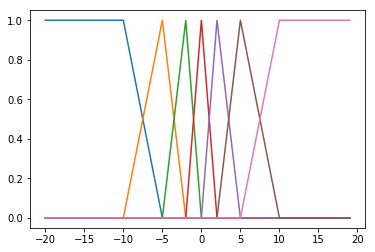

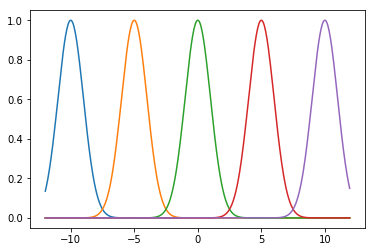

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import membresia as mem

x = np.arange(-4,4,0.1)

m = np.array([[-20, -20, -10, -5], [-10, -5, -5, -2], [-5, -2, -2, 0], [-2, 0, 0, 2], [0, 2, 2, 5], [2, 5, 5, 10], [5, 10, 20, 20]])

m2 = np.array([[-10, 1], [-5, 1], [0, 1], [5, 1], [10, 1]])
x = np.arange(-20, 20)
y = mem.matrizMembresia(x, m, 1)

x2 = np.arange(-12, 12, 0.05)

y = mem.matrizMembresia(x, m, 1)
y2 = mem.matrizMembresia(x2, m2, 2)

plt.figure(1)
list(map(lambda ye : plt.plot(x, ye), y))
plt.figure(2)
list(map(lambda ye : plt.plot(x2, ye), y2))


plt.show()

## Ejercicio 3
Escriba una función que tome como entrada la matriz con la definición
de los p conjuntos, y un valor concreto de la variable de entrada, y
devuelva un vector con los niveles de membresı́a de ese valor para
los p conjuntos. Pruebe esta función con las matrices de conjuntos
utilizadas en el Ejercicio 2.


In [13]:
def matrizMembresia1E(x, M, tipo):
    return matrizMembresia(np.array([x]), M, tipo).reshape((M.shape[0]))

In [14]:
m = np.array([[-20, -20, -10, -5], [-10, -5, -5, -2], [-5, -2, -2, 0], [-2, 0, 0, 2], [0, 2, 2, 5], [2, 5, 5, 10], [5, 10, 20, 20]])
x = 0.5
y = mem.matrizMembresia1E(x, m, 1)
print(y)

[0.   0.   0.   0.75 0.25 0.   0.  ]


La salida obtenida se puede obtener analizando la gráfica de la Matriz M (ejercicio anterior), donde se puede notar que es correcta.

# Ejercicio 4
Implemente una función que tome como entradas los conjuntos de
salida, su tipo y el grado de activación para cada uno, y devuelva el
valor de salida correspondiente. Las fórmulas para el centroide y las
áreas de los conjuntos trapezoidales son relativamente simples. Para
funciones gaussianas, suponga que el centroide coincide con la media, y
el área es igual a σ$(2π)^{1/2}$. Para probarlo, utilice los conjuntos de salida
definidos en la matriz S de tipo triangular, y un vector de activación
a = [0; 0,7; 0,3; 0; 0; 0; 0].
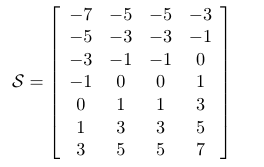
Pruebe también con conjuntos de salida gaussianos definidos por usted
sobre el mismo rango.



### Fuciones para calcular el área

In [15]:
def areaCentr_Trapezoide(h, vConj):
    if h == 0:
       return (0,0) 
    area = np.zeros((3,1))
    centr = np.zeros((3,1))
    if vConj[0] != vConj[1]:
        area[0] = abs(vConj[1] - vConj[0]) * h / 2
        centr[0] = vConj[0] + 2/3 * abs(vConj[1] - vConj[0])
    if vConj[1] != vConj[2]:
        area[1] = abs(vConj[2] - vConj[1]) * h 
        centr[1] = vConj[1] + 1/2 * abs(vConj[2] - vConj[1])
    if vConj[2] != vConj[3]:
        area[2]  = (vConj[3] - vConj[2]) * h / 2
        centr[2] = vConj[2] + 1/3 * abs(vConj[3] - vConj[2])
    
    return h * area.sum(), ((centr.T @ area)[0][0] / h * area.sum())

def areaCentr_Gauss(h, vConj):
    if h == 0.0:
       return (0,0)
    area = h * vConj[1] * np.sqrt(2 * np.pi)    
    return area, vConj[0] 

### Defuzzificacion

In [16]:
def defuzzificacion(gA, M, tipo):
    areaCentr = list() 
    if tipo == 1:
        areaCentr = [areaCentr_Trapezoide(gA[i], conj) for i, conj in enumerate(M)]
    else:
        areaCentr = np.array([areaCentr_Gauss(gA[i], conj) for i, conj in enumerate(M)])
    areaCentr = np.array(areaCentr)

    return (areaCentr[:,1].T @ areaCentr[:,0]) / areaCentr[:,0].sum()

In [17]:
s1 = np.array([[-7,-5, -5, -3], [-5, -3, -3, -1], [-3, -1, -1, 0], [-1, 0, 0, 1], [0, 1, 1, 3], [1, 3 , 3, 5], [3, 5, 5, 7]])
a = np.array([0, 0.7, 0.3, 0, 0, 0, 0])

y1 = mem.defuzzificacion(a, s1, 1)
print(y1)

s2 = np.array([[-10, 1], [-5, 1], [0, 1], [5, 1], [10, 1]])
y2 = mem.defuzzificacion(a,s2, 2)

print(y2)

-7.4919282511210765
-3.4999999999999996


## Ejercicio 5
Reglas del sistema completo. En los sistemas borrosos, los
conjuntos de entrada $A_{i}$ son mapeados en los conjuntos de salida Bj a
partir de reglas tipo if-then, de la forma if la entrada x es $A_{i}$ then
la salida y es $B_{j}$ . Para una entrada y una salida, este tipo de reglas
puede codificarse como un vector de ı́ndices r, donde la componente i-
esima del vector corresponde al conjunto de entrada i, y el valor ri es el
ı́ndice del conjunto de salida que corresponde a esa regla. Por ejemplo,
en un sistema con 3 conjuntos de la variable de entrada y tres de la
variable de salida, el vector r = [3; 2; 1] indica que el conjunto $A_{1}$ de
entrada es mapeado al conjunto $B_{3}$ de salida, el $A_{2}$ de entrada al $B_{2}$
de salida, y el $A_{3}$ de entrada al $B_{1}$ de salida. 
Escriba una función que, dadas las matrices que definen los conjuntos de entrada y salida (y sus
tipos) para un sistema de una entrada con una salida, y el vector de
mapeo entre conjuntos de entrada y conjuntos de salida, devuelva el
valor de salida y del sistema para una entrada dada x. Para probarlo,
considere un sistema borroso cuyos conjuntos de entrada y salida estén
definidos por las matrices M y S, usadas en los ejercicios anteriores.
Además, suponga que las reglas están codificadas en el vector r =
[1; 2; 3; 4; 5; 6; 7].


In [18]:
def sistemaBorroso(x, r, M, S, tipo):
    gA = matrizMembresia1E(x, M, tipo)
    gAN = np.zeros((r.shape[0], 1))
    gAN[r-1] = gA
    return defuzzificacion(gA, S, tipo)

In [19]:
M = np.array([[-20, -20, -10, -5], [-10, -5, -5, -2], [-5, -2, -2, 0], [-2, 0, 0, 2], [0, 2, 2, 5], [2, 5, 5, 10], [5, 10, 20, 20]])
S = np.array([[-7,-5, -5, -3], [-5, -3, -3, -1], [-3, -1, -1, 0], [-1, 0, 0, 1], [0, 1, 1, 3], [1, 3 , 3, 5], [3, 5, 5, 7]])

x = 0.0
print(mem.matrizMembresia1E(x, M, 1))
print( list( map(  lambda vConj: mem.areaCentr_Trapezoide(1, vConj), S)))

r1 = np.array([1, 2, 3, 4, 5 ,6 , 7])
y = mem.sistemaBorroso(x, r1, M, S, 1) 
print(y)
r2 = np.array([4, 2, 3, 1, 5 ,6 , 7])
y = mem.sistemaBorroso(x, r2, M, S, 1) 
print(y)

[0. 0. 0. 1. 0. 0. 0.]
[(2.0, -20.0), (2.0, -12.0), (1.5, -3.0), (1.0, -2.7755575615628914e-17), (1.5, 2.9999999999999996), (2.0, 12.0), (2.0, 20.0)]
-2.7755575615628914e-17
-20.0


La salida de grado de activación es solo 1.0 en el 4° conjunto de entrada, para r1 se mapea el 4° cojunto de salida, por al formula del centroide, solo queda el éste, y se simplifica el area, por lo tanto la salida obtenida es el centroide, -2.77556e-17. Para r2 sucede lo mismo, pero se mapea con el primer conjunto de salida, que tiene centroide -20.0

## Ejercicio 6: 
El sistema borroso como mapeo no lineal entrada-salida. Escriba una función que permita graficar un mapeo (ver figura), para ello use la función del ejercicio anterior, recorriendo todo el rango de valores de entrada posibles y calculando la salida correspondiente. Pruebe esta función con los conjuntos definidos en las matrices M y S y el mapeo de reglas r de los ejercicios anteriores. 
Modifique los conjuntos de entrada para utilizar conjuntos gaussianos en lugar de los trapezoidales, y vuelva a graficar el mapeo resultante. Estudie como cambia la morfología del mapeo si se modifica el solapamiento entre conjuntos. Cambie el mapeo de reglas a r = [7; 6; 5; 4; 3; 2; 1] y analice el resultado.

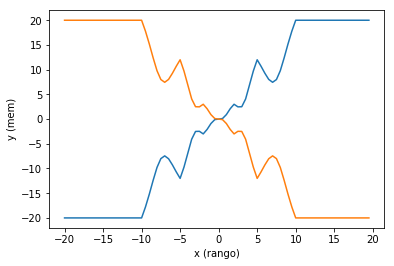

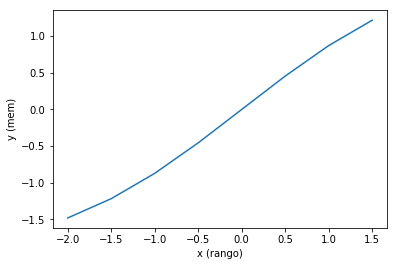

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import membresia as mem


M = np.array([[-20, -20, -10, -5], [-10, -5, -5, -2], [-5, -2, -2, 0], [-2, 0, 0, 2], [0, 2, 2, 5], [2, 5, 5, 10], [5, 10, 20, 20]])
S = np.array([[-7,-5, -5, -3], [-5, -3, -3, -1], [-3, -1, -1, 0], [-1, 0, 0, 1], [0, 1, 1, 3], [1, 3 , 3, 5], [3, 5, 5, 7]])
r = np.array([1, 2, 3, 4, 5 ,6 , 7])
x = np.arange(-20, 20, 0.5)
y = mem.sistemaBorrosoMap(x, r, M, S, 1) 
r2 = np.array([7, 6, 5, 4, 3 ,2 , 1])
y2 = mem.sistemaBorrosoMap(x, r2, M, S, 1) 
plt.figure(1)
plt.plot(x, y, x, y2)
plt.xlabel("x (rango)")
plt.ylabel("y (mem)")

M2 = np.array([[-2, 1], [-1, 1], [0, 1], [1, 1], [2, 1]])
S2 = np.array([[-2, 1], [-1, 1], [0, 1], [1, 1], [2, 1]])
r2 = np.array([1, 2, 3, 4, 5])
x = np.arange(-2, 2, 0.5)
y2 = mem.sistemaBorrosoMap(x, r2, M2, S2, 2) 

plt.figure(2)
plt.plot(x, y2)
plt.xlabel("x (rango)")
plt.ylabel("y (mem)")
plt.show()


## Ejercicio 7: 
Control borroso de un sistema térmico. Se tiene un acondicionador, cuyo funcionamiento se puede representar esquemáticamente como se observa en la Figura. Como se puede apreciar, ingresa líquido a temperatura ti, cuya temperatura es modificada por el acondicionador, egresando a temperatura to. Suponiendo que el flujo es constante, así como la temperatura de ingreso del líquido ti, que el líquido uniformiza su temperatura en forma instantánea y que el proceso está aislado de forma que no se pierde calor, el incremento de temperatura t = to − ti está relacionado con la cantidad de calor q agregado (o quitado) por el acondicionador. Una simulación del comportamiento térmico del acondicionador puede obtenerse mediante la ecuación to[n] = ti + gq + a(to[n − 1] − ti), donde g = a = 40/41 son constantes, q es la cantidad de calor aportada (o quitada) por el 
acondicionador, to[n] y to[n − 1] son los valores actual y anterior de la temperatura de salida, y ti = 15 es el valor de la temperatura de entrada que se supone constante. Suponga que la variable q se puede regular entre -7 y 7.
Se desea diseñar un controlador de temperatura borroso como el de la Figura, el cual toma como entrada el error definido como e = tref −to entre el la temperatura deseada y la que está dando el sistema, y calcula el valor de q a fijar en el acondicionador para generar la temperatura de salida deseada. Utilice como entrada de referencia una temperatura de 15 grados durante los primeros 30 pasos de la simulación, para pasar a 25 grados en los siguientes 170 pasos. La simulación tiene un
tiempo de muestreo de 1 segundo, y se simularan 200 pasos, es decir, 200 segundos. Utilice un valor inicial to[−1] = 15. Considere las siguientes dos posibilidades de conjuntos de entrada
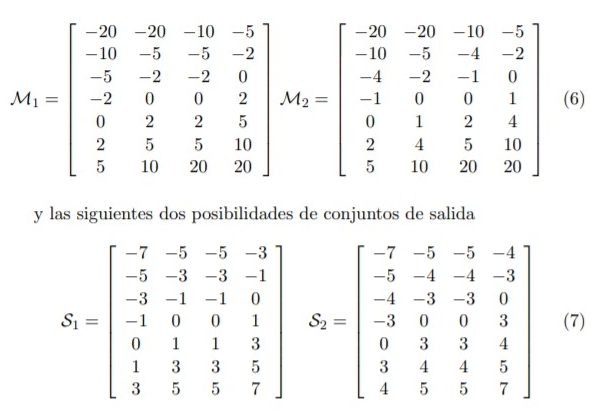
Diseñe el controlador borroso para las cuatro combinaciones de conjuntos de entrada y salida. Para cada caso, analice el comportamiento del controlador, respecto de si presenta error final (alcanza el valor deseado), si oscila, y si tiene sobreimpulso (es decir, inicialmente se pasa del valor final).


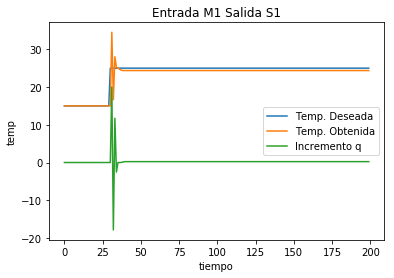

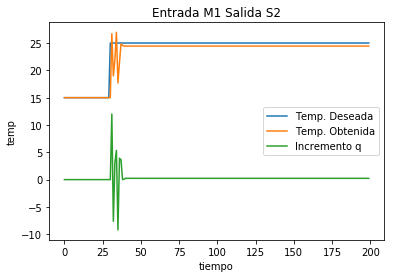

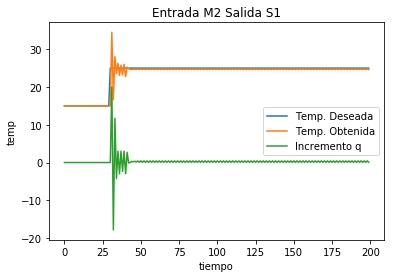

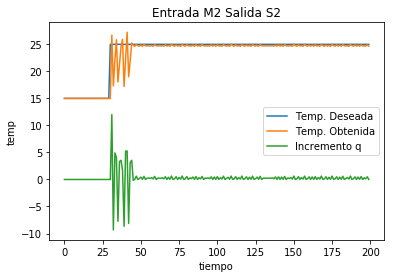

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import membresia as mem


M1 = np.array([[-20, -20, -10, -5], [-10, -5, -5, -2], [-5, -2, -2, 0], [-2, 0, 0, 2], [0, 2, 2, 5], [2, 5, 5, 10], [5, 10, 20, 20]])

M2 = np.array([[-20, -20, -10, -5], [-10, -5, -4, -2], [-4, -2, -1, 0], [-1, 0, 0, 1], [0, 1, 2, 4], [2, 4, 5, 10], [5, 10, 20, 20]])

S1 =np.array([[-7,-5, -5, -3], [-5, -3, -3, -1], [-3, -1, -1, 0], [-1, 0, 0, 1], [0, 1, 1, 3], [1, 3 , 3, 5], [3, 5, 5, 7]])

S2 =np.array([[-7,-5, -5, -4], [-5, -4, -4, -3], [-4, -3, -3, 0], [-3, 0, 0, 3], [0, 3, 3, 4], [3, 4 ,4, 5], [4, 5, 5, 7]])

def contrT_borroso(e, M, S):
    gA = mem.matrizMembresia1E(e, M, 1)
    return mem.defuzzificacion(gA, S, 1)



def contrTemperatura(tempD, toIni, M, S):

    to = np.zeros((tempD.shape[0]))
    q = np.zeros((tempD.shape[0]))

    e = tempD[0] - toIni
    q[0] = contrT_borroso(e, M, S)
    
    g = 40 / 41
    a = 40 / 41
    ti = 15
    toN = lambda toAnt, q: ti + g * q + a* (toAnt - ti)
    
    to[0]= toN(toIni, q[0])
    for i in range(tempD.shape[0] - 1):
        e = tempD[i] - to[i]
        q[i+1] = contrT_borroso(e, M, S)
        to[i+1]= toN(to[i], q[i+1])

    return to, q


temp = np.ones((200))
temp[0:30] = 15 * temp[0:30]
temp[30:] = 25 * temp[30:]
toIni = 15

to_M1S1, q1 = contrTemperatura(temp, toIni, M1, S1)
to_M1S2, q2 = contrTemperatura(temp, toIni, M1, S2)

to_M2S1, q3 = contrTemperatura(temp, toIni, M2, S1)
to_M2S2, q4 = contrTemperatura(temp, toIni, M2, S2)

tiempo = np.arange(0,200)

plt.figure(1)
plt.title("Entrada M1 Salida S1")
plt.plot(tiempo, temp, tiempo, to_M1S1, tiempo, q1)
plt.xlabel("tiempo")
plt.ylabel("temp")
plt.legend(("Temp. Deseada", "Temp. Obtenida", "Incremento q"), loc = "center right")
plt.show()

plt.figure(2)
plt.title("Entrada M1 Salida S2")
plt.plot(tiempo, temp, tiempo, to_M1S2, tiempo, q2)
plt.xlabel("tiempo")
plt.ylabel("temp")
plt.legend(("Temp. Deseada", "Temp. Obtenida", "Incremento q"), loc = "center right")
plt.show()

plt.figure(3)
plt.title("Entrada M2 Salida S1")
plt.plot(tiempo, temp, tiempo, to_M2S1, tiempo, q3)
plt.xlabel("tiempo")
plt.ylabel("temp")
plt.legend(("Temp. Deseada", "Temp. Obtenida", "Incremento q"), loc = "center right")
plt.show()

plt.figure(4)
plt.title("Entrada M2 Salida S2")
plt.plot(tiempo, temp, tiempo, to_M2S2, tiempo, q4)
plt.xlabel("tiempo")
plt.ylabel("temp")
plt.legend(("Temp. Deseada", "Temp. Obtenida", "Incremento q"), loc = "center right")
plt.show()
